비지도학습

- 차원 축소
  Feature Engineering
  - feature selection : 특성 간 종속성이 강한 경우, 특징을 잘 나타낼 수 있는 특성을 선택
    -> filtering, wrapper, embedded

  - feature extraction : 특성을 압축하여 추출
    (특성을 함축적으로 더 잘 설명할 수 있는 새로운 차원으로 맵핑)
    -> pca, t-sne, lda


x 를 다 쓰는 게 아니고 일부만 뽑아서 사용하고 싶다면?


- 군집 (Clustering) : 비슷한 특징을 가진 특성끼리 각각의 그룹으로 할당

- k-means : 클러스터의 중심을 찾고, 클러스터 k개의 평균을 가지고 클러스터의 중심을 재설정 하는 작업을 반복

- agglomerative clustering (병합군집) : 시작할 때 각 데이터를 하나의 클러스터로 지정, 그 다음 가까운 클러스터와 병합 > 반복

- mean shift : 데이터의 밀도가 높은 곳으로 중심을 이동
    -> KDE(Kernel Density Estimation - 커널 밀도 추정)를 통해서 확률 밀도를 구함 (대역폭을 사용하여 kde 형태 지정)

- dbscan (density-based spatial clustering of applicarions with noise) : 밀집 지역 (dense region)의 포인트를 찾아서 클러스터 분류

# pca

principal Component Analysis : 변수 간 상관관례를 이용해 주성분 추출 -> 차원 축소 (데이터의 유실이 최소화)

가장 높은 분산을 가지는 데이터를 찾자 = 분산이 높으면 데이터의 특성을 가장 잘 나타내는 것으로 간주

데이터가 넓게 퍼져 있으면 우리가 찾고자 하는 y에 대해서 가장 많은 것을 포함하고 있다 = 분산이 크다는 것

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
iris_target_names = list(map(lambda x : "_".join(x.split(" ")[:-1]), iris.feature_names))

iris_target_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [39]:
iris_df = pd.DataFrame(iris.data, columns=iris_target_names)
iris_df["target"] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


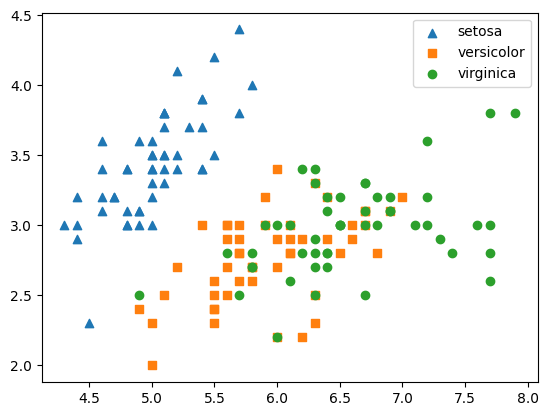

In [40]:
markers = ["^", "s", "o"]

for idx, marker in enumerate(markers):
    x = iris_df[iris_df["target"] == idx]["sepal_length"]
    y = iris_df[iris_df["target"] == idx]["sepal_width"]

    plt.scatter(x, y, marker=marker, label=iris.target_names[idx])

plt.legend()
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
iris_scale = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

# 마지막 타겟을 빼고 스케일링 하겠다

In [43]:
from sklearn.decomposition import PCA

In [44]:
# 주성분 2개 가져올 거야 = 차원을 2개로 압축할거야
# 4개의 차원을 2개로 바꾸자
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scale)
iris_pca.shape

# shape이 2개로 떨어짐

(150, 2)

In [45]:
iris_df_pca = pd.DataFrame(iris_pca, columns=["pca_component_1", "pca_component_2"])
iris_df_pca["target"] = iris.target
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [46]:
# 차원 4개에서 아래 4개 나뉘어져 있는 게 4개 가중치로 각각 정해져서
# 이런 식으로 각각 150개를 바꿈

pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

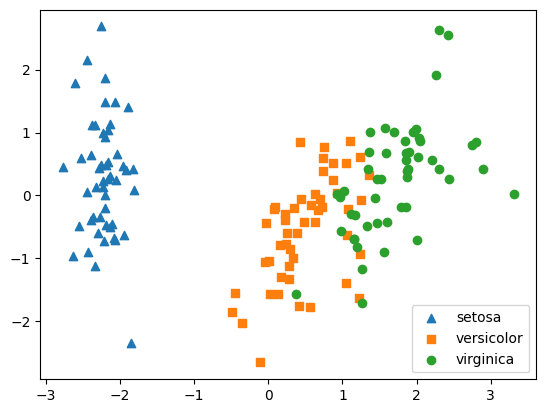

In [47]:
markers = ["^", "s", "o"]

for idx, marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca["target"] == idx]["pca_component_1"]
    y = iris_df_pca[iris_df_pca["target"] == idx]["pca_component_2"]

    plt.scatter(x, y, marker=marker, label=iris.target_names[idx])

plt.legend()
plt.show()

In [48]:
import seaborn as sns

<Axes: >

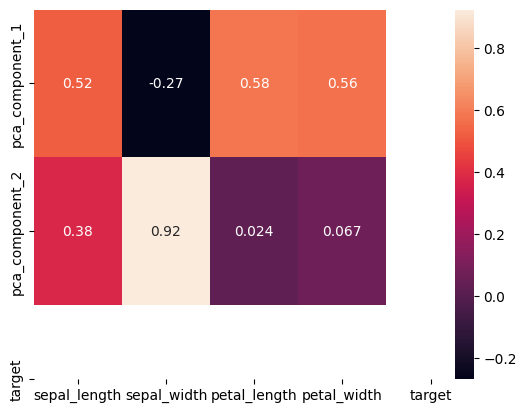

In [49]:
# 각각 4개의 특성들을 가져와서 압축함
# 이걸 하는 이유는 과적합을 막기 위해서
sns.heatmap(pca.components_, annot=True, xticklabels=iris_df.columns, yticklabels=iris_df_pca.columns)

In [50]:
# 분산 비율
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [52]:
model = RandomForestClassifier(random_state=1)

In [53]:
score_origin = cross_val_score(model, iris.data, iris.target)
print(score_origin)
print(score_origin.mean())

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


In [55]:
score_pca = cross_val_score(model, iris_df_pca.iloc[:, :-1], iris_df_pca.iloc[:, -1])

print(score_pca)
print(score_pca.mean())

[0.83333333 0.93333333 0.83333333 0.9        1.        ]
0.9
